In [1]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
matplotlib.rc("font", family = "Malgun Gothic")
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
matplotlib.rc("font", family = "Malgun Gothic")
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df_raw = pd.read_csv("유방암.csv")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 결측치를 확인한다.

In [3]:
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [4]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df_y = df_raw_dummy["diagnosis"]
df_x = df_raw_dummy.drop("diagnosis", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data x size: {}".format(df_train_x.shape))
print("train data y size: {}".format(df_train_y.shape))
print("test data x size: {}".format(df_test_x.shape))
print("test data y size: {}".format(df_test_y.shape))

train data x size: (398, 30)
train data y size: (398,)
test data x size: (171, 30)
test data y size: (171,)


### 보다 나은 검정을 위해 정규화 시킨다.

In [7]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [8]:
df_scaled_train_x, df_scaled_test_x =  train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
print("train data x size: {}".format(df_scaled_train_x.shape))
print("test data x size: {}".format(df_scaled_test_x.shape))

train data x size: (398, 30)
test data x size: (171, 30)


In [9]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Scoring on training set: 0.995
Scoring on test set: 0.942


In [12]:
train_accuracy = []; test_accuracy = []
para_c = [10**c for c in range(-5, 5)]

for v_c in para_c:
    svm = SVC(C = v_c, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.000,0.633,0.614
1,0.000,0.633,0.614
2,0.001,0.633,0.614
3,0.010,0.633,0.614
4,0.100,0.967,0.895
5,1.000,0.995,0.942
6,10.000,0.997,0.959
7,100.000,1.000,0.947
8,1000.000,1.000,0.947
9,10000.000,1.000,0.947


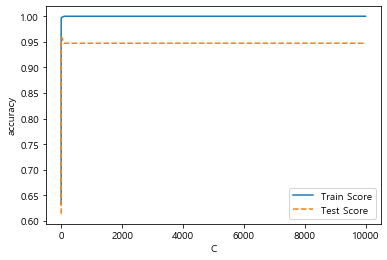

In [13]:
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Score")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

### C가 1000일때 accuracy값이 가장 좋기 때문에 1000을 선택한다.

In [10]:
train_accuracy = []; test_accuracy = []
para_gamma = [10**gamma for gamma in range(-4, 4)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 10000, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.000,0.995,0.947
1,0.001,1.000,0.959
2,0.010,1.000,0.942
3,0.100,1.000,0.924
4,1.000,1.000,0.626
5,10.000,1.000,0.614
6,100.000,1.000,0.614
7,1000.000,1.000,0.614


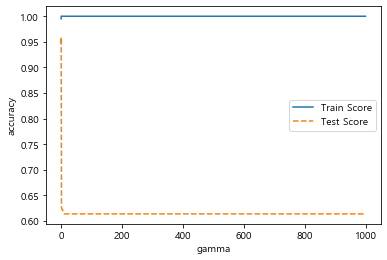

In [11]:
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Score")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

### gamma의 값은 0.001일때 가장 좋기 때문에 0.001을 선택한다.

In [12]:
svc_final = SVC(gamma = 0.001, C =10000, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)
print("Accuracy on training set: {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svc_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 0.959
Confusion matrix: 
[[104   1]
 [  6  60]]


### 최종모델 결과 훈련 accuracy는 100%, test accuracy는 95.9% 로 잘 작동하는 것으로 평가할 수 있다. confusion matrix는 위와 같다.